In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

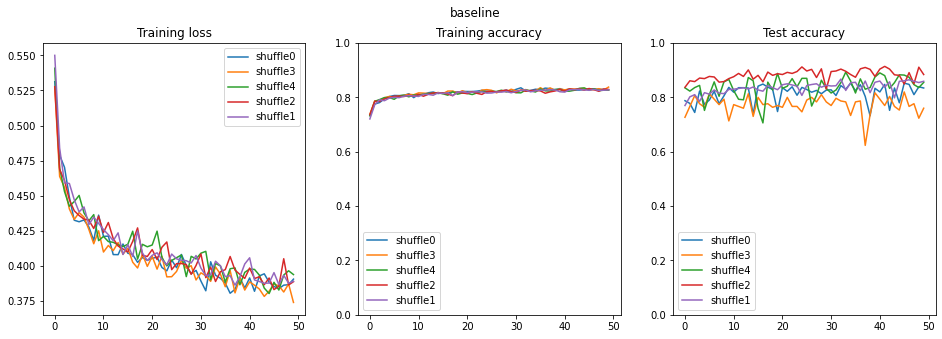

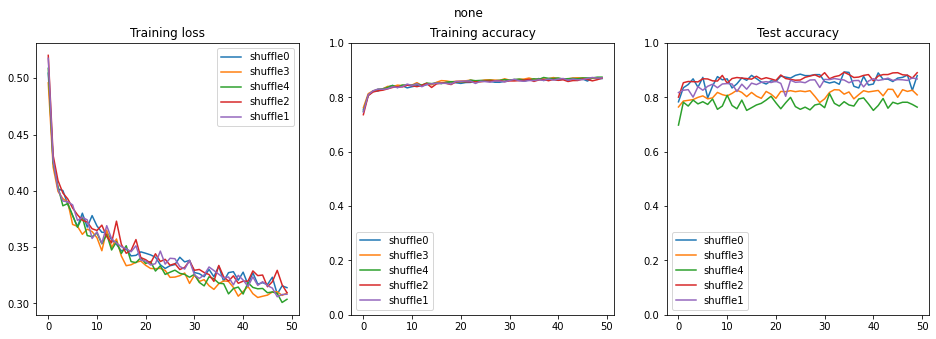

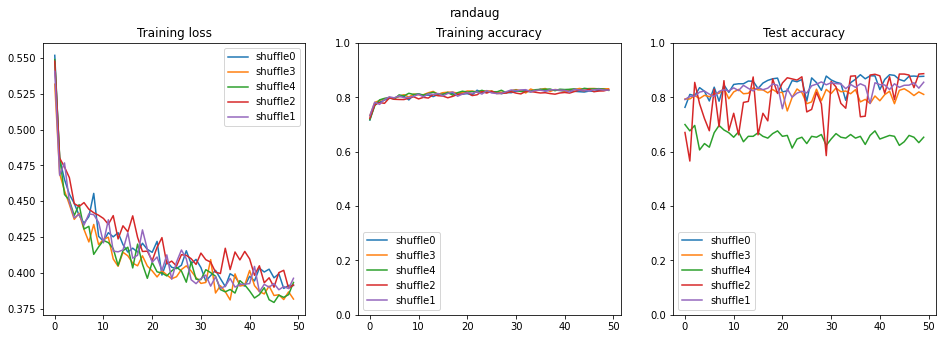

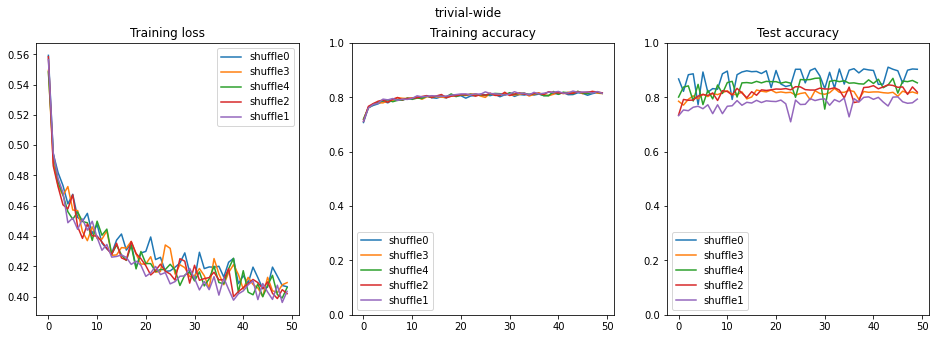

In [9]:
run_dir = Path("runs/benchmark-augmentation")


for group in sorted(run_dir.glob('*/run0')):
    plt.figure(figsize=(16, 5))
    gs = plt.GridSpec(1, 3)
    plt.suptitle(group.parts[-2])
    
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        ax = plt.subplot(gs[0])
        plt.title("Training loss")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.loss, label=shuffle.parts[-1])
        plt.legend()
        
        ax = plt.subplot(gs[1])
        plt.title("Training accuracy")
        df = pd.read_csv(shuffle / 'train.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
        ax = plt.subplot(gs[2])
        plt.title("Test accuracy")
        df = pd.read_csv(shuffle / 'val.csv')
        plt.plot(df.epoch, df.accuracy, label=shuffle.parts[-1])
        plt.ylim(0, 1)
        plt.legend()
        
    plt.show()

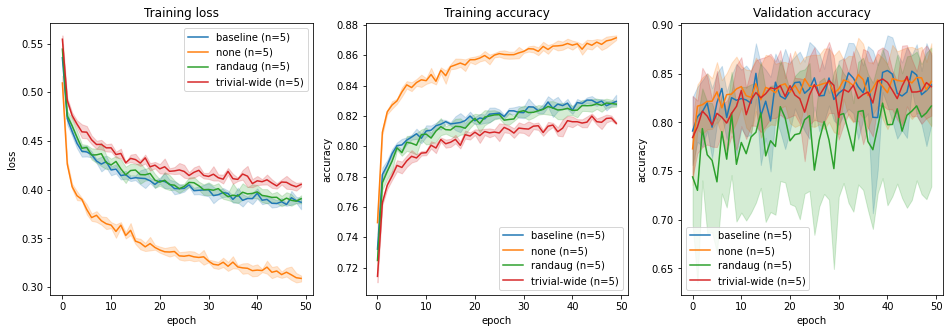

In [14]:
run_dir = Path("runs/benchmark-augmentation")

plt.figure(figsize=(16, 5))
gs = plt.GridSpec(1, 3)
    
for group in sorted(run_dir.glob('*/run0')):
    train_dfs = []
    val_dfs = []
    for shuffle in group.glob("shuffle*/"):
        if not (shuffle / 'train.csv').exists():
            continue
        
        df = pd.read_csv(shuffle / 'train.csv')
        train_dfs.append(df)
        
        df = pd.read_csv(shuffle / 'val.csv')
        val_dfs.append(df)
    
    train_df = pd.concat(train_dfs)
    train_df = train_df.reset_index()
    
    val_df = pd.concat(val_dfs)
    val_df = val_df.reset_index()
    
    label = f"{group.parts[-2]} (n={len(train_dfs)})"
    ax = plt.subplot(gs[0])
    plt.title("Training loss")
    sns.lineplot(data=train_df, x='epoch', y='loss', label=label)
    
    ax = plt.subplot(gs[1])
    plt.title("Training accuracy")
    sns.lineplot(data=train_df, x='epoch', y='accuracy', label=label)
    
    ax = plt.subplot(gs[2])
    plt.title("Validation accuracy")
    sns.lineplot(data=val_df, x='epoch', y='accuracy', label=label)